# Euler vs Exact Simulation

This runs the following simulations.

1. Process 5.1 (1d)
2. Process 5.2 (1d)
3. The process from section 5.2 (4d)
4. The Heston variance process (1d)
5. A sine drift process (1d)
6. An Ornstein-Uhlenbeck process (1d)

Each Process is simulated first using the Euler scheme and then repeated using the Exact method.

In [19]:
source('one_dimension/general_euler.r')
source('one_dimension/driftless_exact.r')
source('one_dimension/drifted_exact.r')
source('one_dimension/drifted_exact_vec.r')
source('one_dimension/drifted_exact_vec_mc.r')

source('multiple_dimensions/general_euler_multi_d.r')
source('multiple_dimensions/drifted_exact_multi_d.r')

source('run_simulation.r')
source('coefficients.r')
source('payoffs.r')

In [2]:
compare_vols <- function(vol_df,title=NA){
    matplot(vol_df$K, vol_df[names(vol_df)!='K'], main=title, xlab='K', ylab='Implied Vol', type='l', lty=1)
    legend('topright', inset=.05, legend=names(vol_df)[names(vol_df)!='K'], lty=1, col=1:(ncol(vol_df)-1))
}

## Driftless process (equation 5.1)
$$ X_0=1, \,\,\,\, dX_t=\frac{2\sigma}{1+X_t^2}dW_t $$

### Parameters

In [3]:
num_paths_euler <- 1000000
num_steps_euler <- 100

num_paths_exact <- 1000000
beta <- 0.2

Texp <- 1
X0 <- 1
strikes <- seq(0.6, 1.5, by=0.1)
one_d_from_paper_vols <- data.frame(K=strikes) # Save to global object for overlaid plots

### Euler scheme

Prices
 0.4551494 0.3720934 0.2942435 0.2231265 0.1604805 0.1079341 0.0666597 0.03694295 0.01784122 0.007255942 
     K       Price Implied.Vol
1  0.6 0.455149433   0.6265170
2  0.7 0.372093366   0.5572597
3  0.8 0.294243487   0.4987663
4  0.9 0.223126531   0.4485377
5  1.0 0.160480529   0.4050163
6  1.1 0.107934089   0.3669892
7  1.2 0.066659698   0.3335238
8  1.3 0.036942947   0.3039019
9  1.4 0.017841223   0.2775205
10 1.5 0.007255942   0.2540438


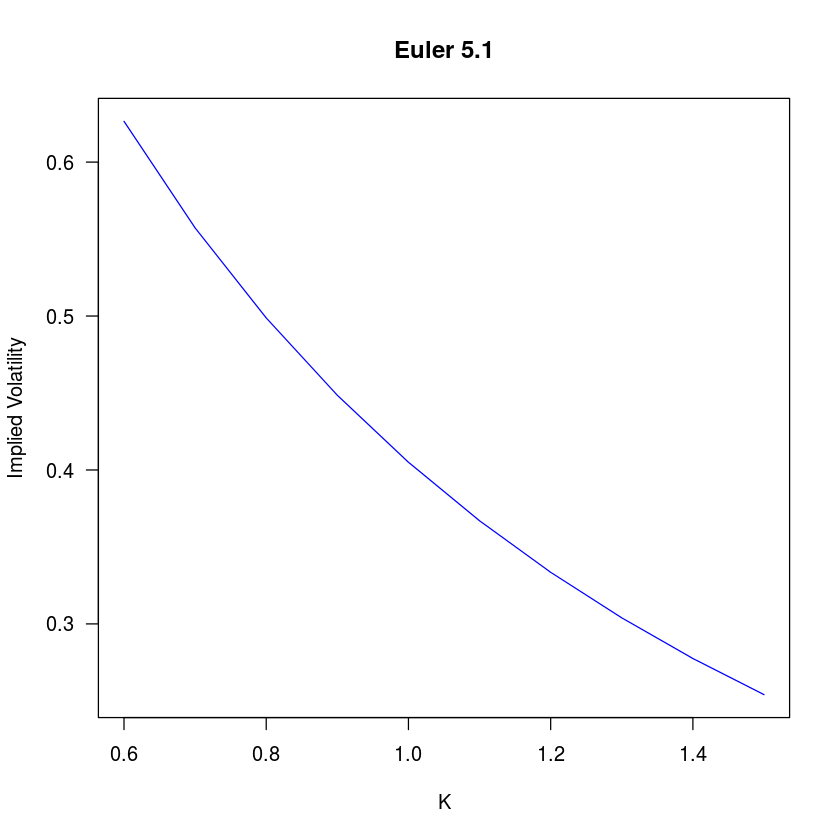

In [4]:
title <- 'Euler 5.1'
euler51_process <- General_Euler(num_paths_euler, num_steps_euler,
                                 mu=make_constant_coefficient(0),
                                 sigma=sigma_from_paper,
                                 Texp=Texp, X0=X0)

one_d_from_paper_vols[title] <- run_simulation(euler51_process, strikes, Texp, X0, make_call_payoff,
                                               plot_title=title, num_paths_to_plot=FALSE)

### Exact Method

Prices
 0.4545838 0.3714339 0.2936231 0.2226821 0.1601396 0.1076101 0.06630464 0.03658955 0.0175473 0.007065321 
     K       Price Implied.Vol
1  0.6 0.454583812   0.6238333
2  0.7 0.371433878   0.5547369
3  0.8 0.293623098   0.4967834
4  0.9 0.222682126   0.4472999
5  1.0 0.160139608   0.4041441
6  1.1 0.107610136   0.3661747
7  1.2 0.066304637   0.3325668
8  1.3 0.036589551   0.3027595
9  1.4 0.017547298   0.2762049
10 1.5 0.007065321   0.2526282


ERROR: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[1]]) result is length 0


,self.time,self.pct,total.time,total.pct
"""""",19.5,29.98,65.04,100
""".External""",6.36,9.78,6.36,9.78
"""Poisson_Process""",5.72,8.79,11.6,17.84
"""sigma_deriv""",5.24,8.06,6.34,9.75
"""malliavin_weight""",5.1,7.84,11.12,17.1
"""sigma""",4.6,7.07,5.28,8.12
"""*""",2.22,3.41,2.22,3.41
"""psi""",1.88,2.89,5.58,8.58
"""rexp""",1.62,2.49,4.98,7.66
"""g""",1.62,2.49,3.34,5.14


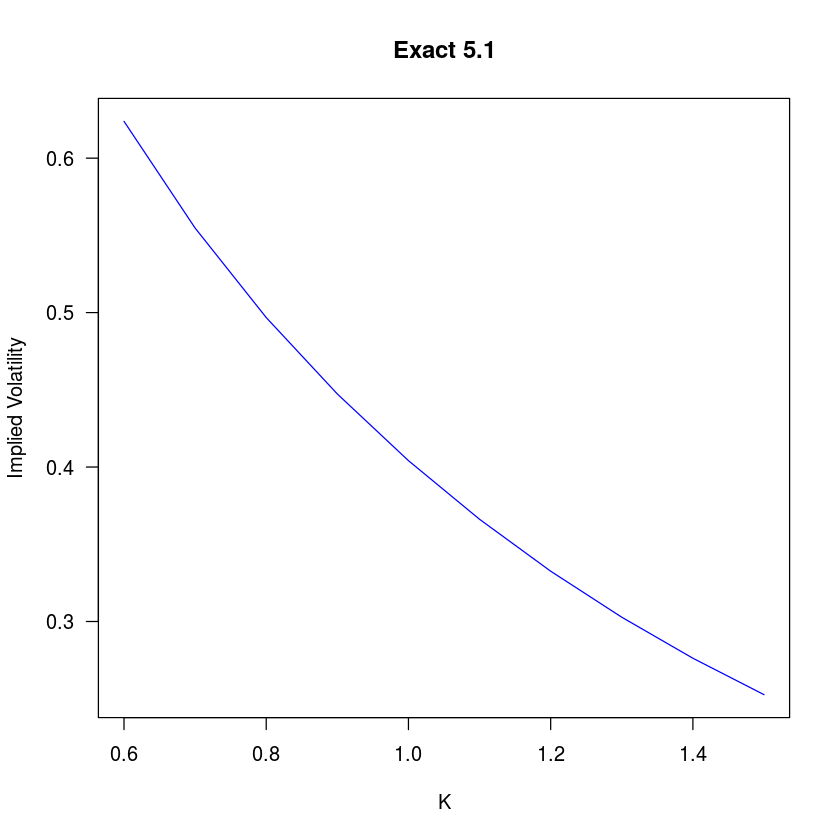

In [5]:
source('one_dimension/driftless_exact.r')
Rprof(tmp <- tempfile())#,line.profiling=TRUE)
title <- 'Exact 5.1'
exact51_process <- Driftless_Exact(num_paths_exact, beta,
                                   sigma_from_paper,
                                   sigma_deriv_from_paper,
                                   Texp=Texp, X0=X0)

one_d_from_paper_vols[title] <- run_simulation(exact51_process, strikes, Texp, X0, make_call_payoff,
                                               plot_title=title, num_paths_to_plot=FALSE)
Rprof()
summaryRprof(tmp)#,lines = "show")

## Drifted process (equation 5.2)
$$ Y_0=0, \,\,\,\, dY_t = \frac{2\sigma X_t}{\left(1+X_t^2\right)^2}dt+dW_t 
\,\,\,\,
\mbox{where}
\,\,\,\,
2\sigma Y_t = X_t-X_0+\frac{X_t^3 - X_0^3}3 $$

Same parameters as equation 5.1

### Euler Scheme

Prices
 0.4553706 0.3722416 0.2943255 0.2231442 0.1604315 0.1078104 0.06647424 0.03674133 0.01766907 0.007127056 
Time difference of 25.77075 secs
     K       Price Implied.Vol
1  0.6 0.455370572   0.6275644
2  0.7 0.372241626   0.5578264
3  0.8 0.294325519   0.4990284
4  0.9 0.223144157   0.4485868
5  1.0 0.160431546   0.4048910
6  1.1 0.107810363   0.3666781
7  1.2 0.066474244   0.3330241
8  1.3 0.036741326   0.3032505
9  1.4 0.017669074   0.2767511
10 1.5 0.007127056   0.2530889


ERROR: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[1]]) result is length 0


,self.time,self.pct,total.time,total.pct
"""rnorm""",7.88,30.59,7.88,30.59
"""^""",7.76,30.12,7.76,30.12
"""""",3.12,12.11,25.76,100
"""matrix""",2.22,8.62,10.1,39.21
"""*""",1.48,5.75,1.48,5.75
"""+""",0.98,3.8,0.98,3.8
"""sqrt""",0.72,2.8,0.72,2.8
"""convert_y_to_x_1d""",0.68,2.64,10.62,41.23
"""/""",0.66,2.56,0.66,2.56
"""-""",0.22,0.85,0.22,0.85


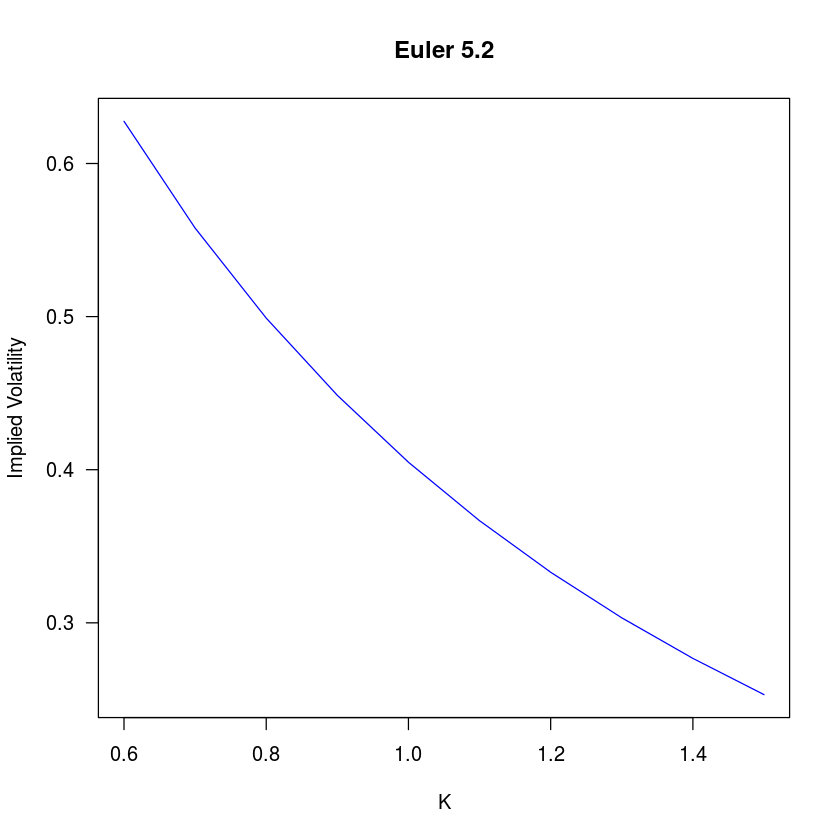

In [10]:
source('one_dimension/general_euler.r')
Rprof(tmp <- tempfile())#,line.profiling=TRUE)
title <- 'Euler 5.2'
euler52_process <- General_Euler(num_paths_euler, num_steps_euler,
                                 mu=mu_from_paper,
                                 sigma=make_constant_coefficient(1),
                                 Texp=Texp, X0=X0,
                                 convert_y_to_x=convert_y_to_x_1d,
                                 convert_x_to_y=convert_x_to_y_1d)

one_d_from_paper_vols[title] <- run_simulation(euler52_process, strikes, Texp, X0, make_call_payoff,
                                               plot_title=title, num_paths_to_plot=FALSE)
Rprof()
summaryRprof(tmp)#,lines = "show")

### Exact Method

In [ ]:
source('one_dimension/drifted_exact.r')
Rprof(tmp <- tempfile())#,line.profiling=TRUE)
title <- 'Exact 5.2'
exact52_process <- Drifted_Exact(num_paths_exact, beta,
                                 mu_from_paper,
                                 sigma0=1,
                                 Texp=Texp, X0=X0,
                                 convert_y_to_x=convert_y_to_x_1d,
                                 convert_x_to_y=convert_x_to_y_1d)

one_d_from_paper_vols[title] <- run_simulation(exact52_process, strikes, Texp, X0, make_call_payoff,
                                               plot_title=title, num_paths_to_plot=FALSE)
Rprof()
summaryRprof(tmp)#,lines = "show")

#### Vectorized

Prices
 0.4556123 0.3723858 0.2944053 0.2232255 0.1604803 0.1077927 0.06643627 0.03672727 0.01771372 0.007202324

Time Elapsed: 6.682012 

     K       Price Implied.Vol
1  0.6 0.455612310   0.6287084
2  0.7 0.372385806   0.5583772
3  0.8 0.294405314   0.4992833
4  0.9 0.223225541   0.4488135
5  1.0 0.160480344   0.4050159
6  1.1 0.107792669   0.3666336
7  1.2 0.066436275   0.3329217
8  1.3 0.036727268   0.3032051
9  1.4 0.017713718   0.2769509
10 1.5 0.007202324   0.2536476


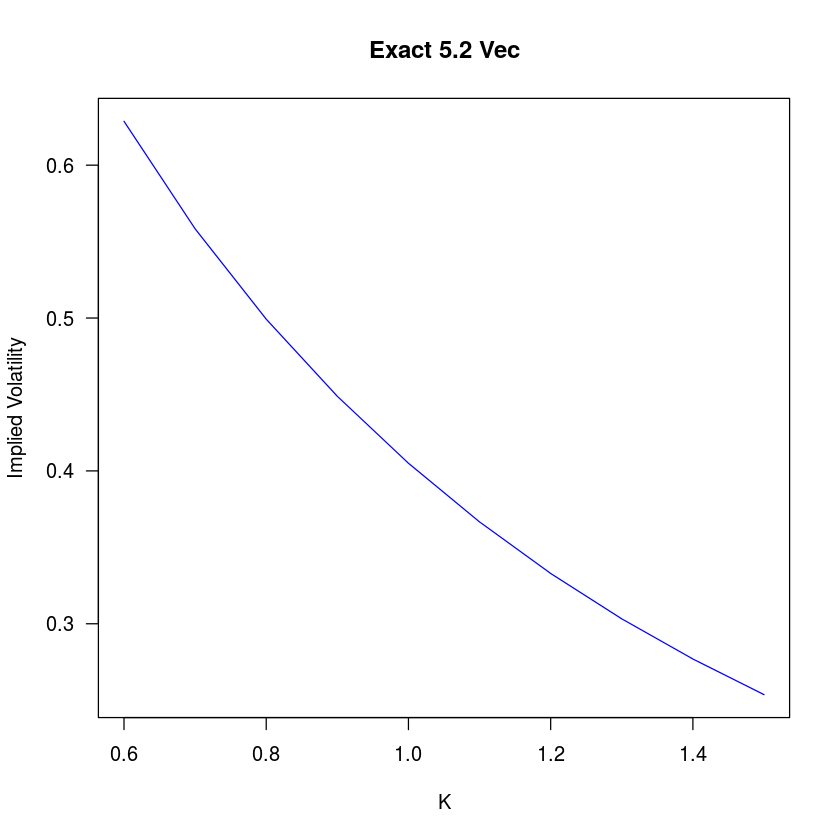

In [20]:
source('one_dimension/drifted_exact_vec.r')
source('one_dimension/drifted_exact_vec_mc.r')
# Rprof(tmp <- tempfile())#,line.profiling=TRUE)
title <- 'Exact 5.2 Vec'
#ptm<-proc.time()
exact52_process <- Drifted_Exact_Vec(num_paths_exact, beta,
                                     mu_from_paper,
                                     sigma0=1,
                                     Texp=Texp, X0=X0,
                                     convert_y_to_x=convert_y_to_x_1d,
                                     convert_x_to_y=convert_x_to_y_1d)

one_d_from_paper_vols[title] <- run_simulation(exact52_process, strikes, Texp, X0, make_call_payoff,
                                               plot_title=title, num_paths_to_plot=FALSE)
#print(proc.time()-ptm)
# Rprof()
# summaryRprof(tmp)#,lines = "show")

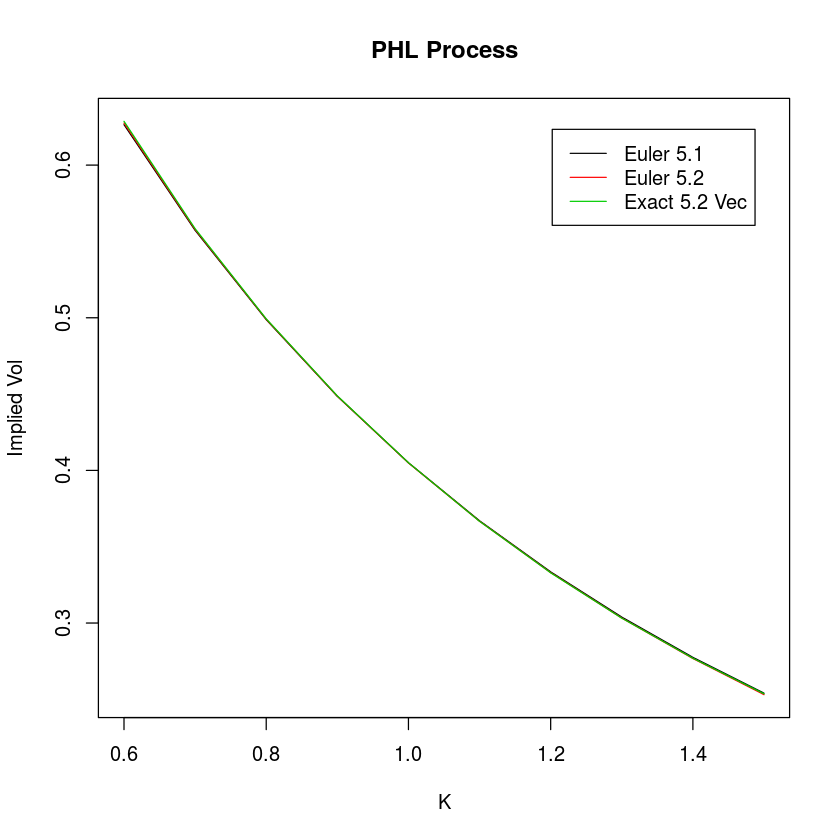

In [21]:
compare_vols(one_d_from_paper_vols, 'PHL Process')

## Drifted Multi-Dimensional (Section 5.2)
$$\frac{dX_t^i}{X_t^i}=\frac12dW_t^i + .1(\sqrt{X_t^i}-1)dt
\,\,\,\,
\mbox{where}
\,\,\,\,
X_0^i=1,
\,\,\,\,
d\langle W^i,W^j\rangle_t=.5dt,
\,\,\,\,
i\neq j=1,...,d.$$

### Parameters

In [48]:
num_paths_euler <- 100000
num_steps_euler <- 100

num_paths_exact <- 10000
beta <- 0.2

d <- 4
Texp <- 1
X0 <- 1
strikes <- seq(0.6, 1.5, by=0.1)
multi_d_from_paper_vols <- data.frame(K=strikes) # Save to global object for overlaid plots

### Euler Scheme

prices
 0.4215475 0.3409219 0.2712313 0.2129235 0.1654885 0.1278009 0.0982441 0.07520394 0.0574163 0.04380671 
     K      Price Implied.Vol
1  0.6 0.42154745   0.4475622
2  0.7 0.34092186   0.4318967
3  0.8 0.27123127   0.4242636
4  0.9 0.21292345   0.4201104
5  1.0 0.16548848   0.4178379
6  1.1 0.12780094   0.4168508
7  1.2 0.09824410   0.4164268
8  1.3 0.07520394   0.4160311
9  1.4 0.05741630   0.4157108
10 1.5 0.04380671   0.4155720


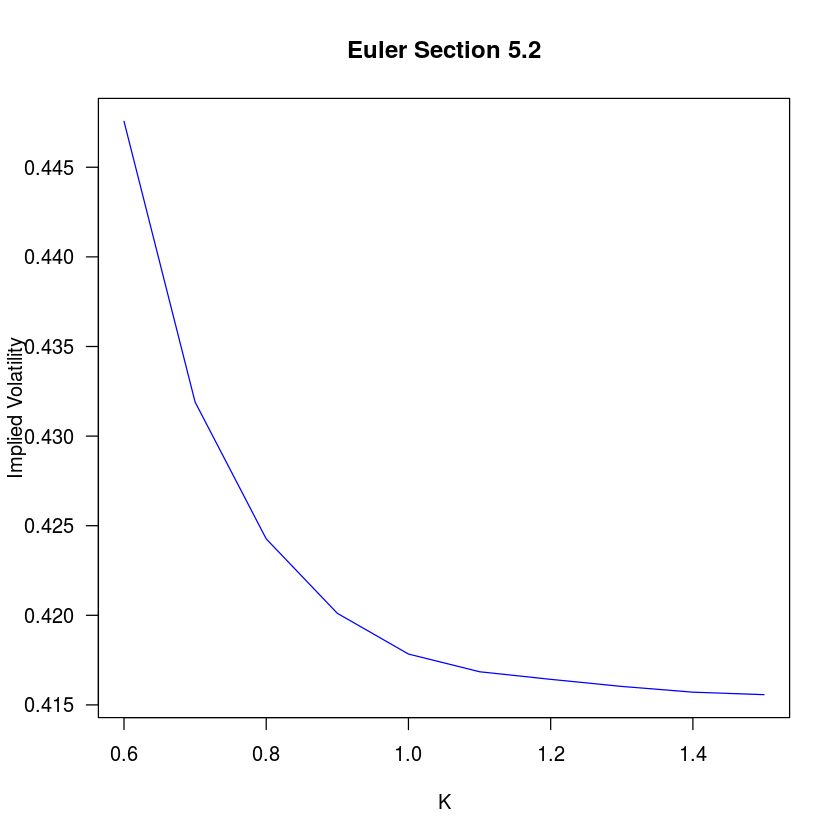

In [54]:
source('multiple_dimensions/general_euler_multi_d.r')
title <- 'Euler Section 5.2'
euler_section_52_process <- General_Euler_Multi_D(num_paths_euler, num_steps_euler,
                                 mu=sapply(1:d, make_mu_section_52_euler),
                                 sigma=sapply(1:d, make_sigma_section_52_euler),
                                 cov_matrix=matrix(.5, nrow=d, ncol=d) + diag(d)*.5,
                                 Texp=Texp, X0=X0)

multi_d_from_paper_vols[title] <- run_simulation(euler_section_52_process, strikes, Texp, X0[1], make_basket_call_payoff, plot_title=title)

### Exact method

prices
 0.4253079 0.3456167 0.2767153 0.218761 0.171461 0.1333341 0.103121 0.07928471 0.06064505 0.04648566 
     K      Price Implied.Vol
1  0.6 0.42530787   0.4707663
2  0.7 0.34561674   0.4518634
3  0.8 0.27671531   0.4422301
4  0.9 0.21876098   0.4363772
5  1.0 0.17146098   0.4331514
6  1.1 0.13333413   0.4307218
7  1.2 0.10312101   0.4289511
8  1.3 0.07928471   0.4271643
9  1.4 0.06064505   0.4253423
10 1.5 0.04648566   0.4245040


ERROR: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[1]]) result is length 0


,self.time,self.pct,total.time,total.pct
"""options""",1.48,20.61,1.48,20.61
"""mean""",0.76,10.58,1.08,15.04
"""""",0.66,9.19,7.18,100
"""eigen""",0.34,4.74,0.68,9.47
"""mvrnorm""",0.32,4.46,3.52,49.03
"""matrix""",0.28,3.9,0.42,5.85
"""g""",0.26,3.62,1.4,19.5
"""psi""",0.22,3.06,1.7,23.68
""".External""",0.18,2.51,0.18,2.51
"""match""",0.16,2.23,1.64,22.84


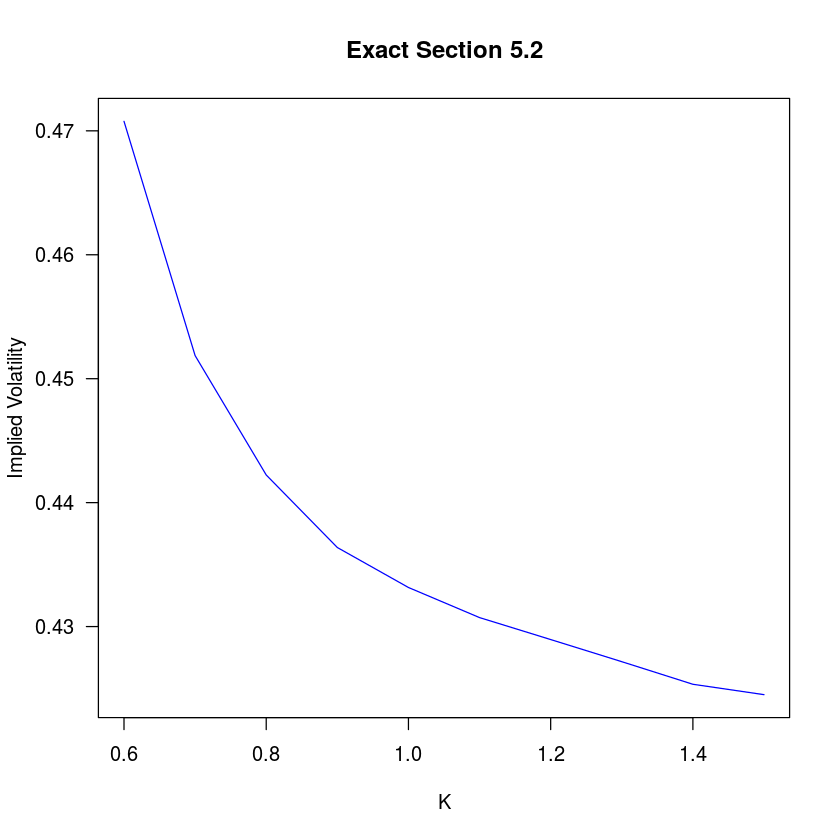

In [75]:
source('multiple_dimensions/drifted_exact_multi_d.r')
Rprof(tmp <- tempfile())#,line.profiling=TRUE)
title <- 'Exact Section 5.2'
X0 <- rep(1, d)
exact_section_52_process <- Drifted_Exact_Multi_D(num_paths_exact, beta,
                                 mu=sapply(1:d, make_mu_from_paper_multi_dimension_lamperti),
                                 sigma0=diag(d),
                                 cov_matrix=matrix(.5, nrow=d, ncol=d) + diag(d)*.5,
                                 Texp=Texp, X0=X0,
                                 convert_y_to_x=convert_y_to_x_multi_d,
                                 convert_x_to_y=convert_x_to_y_multi_d)

multi_d_from_paper_vols[title] <- run_simulation(exact_section_52_process, strikes, Texp, X0[1], make_basket_call_payoff_exact, plot_title=title)
Rprof()
summaryRprof(tmp)#,lines = "show")

### Comparing Implied Volatilities

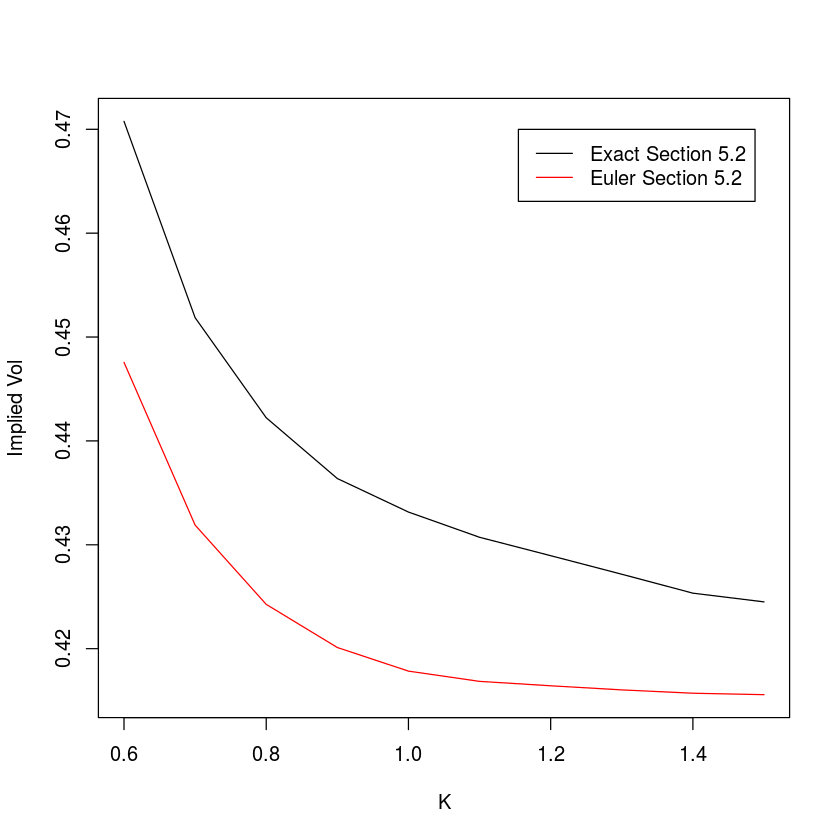

In [76]:
compare_vols(multi_d_from_paper_vols)

## Heston Variance Process

$$ dv_t = -\lambda(v_t-\bar v)dt + \eta \sqrt{v_t}dW_t$$
The BCC and BCC2 parameters fail the Feller condition.  Using those parameters would make 0 an attainable variance.  We therefore use the BCC1 parameters.

### Parameters

In [25]:
paramsBCC  <- list(lambda = 1.15,rho = -0.64,eta = 0.39,  vbar = 0.04,v0 = 0.04)
paramsBCC1 <- list(lambda = 1.15,rho = -0.64,eta = 0.39/2,vbar = 0.04,v0 = 0.04)
paramsBCC2 <- list(lambda = 1.15,rho = -0.64,eta = 0.39*2,vbar = 0.04,v0 = 0.04)
feller <- function(params) 2*params$lambda*params$vbar - params$eta^2 > 0

c(feller(paramsBCC), feller(paramsBCC1), feller(paramsBCC2))

[1] FALSE  TRUE FALSE

In [11]:
params <- paramsBCC1
cat('Is the Feller condition satisfied: ', feller(params))

num_paths_euler <- 100000
num_steps_euler <- 100

num_paths_exact <- 100000
beta <- 0.2

Texp <- 1
X0 <- params$v0
strikes <- seq(0.05, 0.12, by=0.01)
# strikes <- seq(0.5, 0.8, by=0.2)
heston_variance_vols <- data.frame(K=strikes)

Is the Feller condition satisfied:  TRUE

### Euler Scheme

Prices
 0.006003646 0.003690073 0.002215439 0.001302796 0.0007526861 0.0004285518 0.0002409427 0.0001340636 
     K        Price Implied.Vol
1 0.05 0.0060036460   0.5805818
2 0.06 0.0036900734   0.5607315
3 0.07 0.0022154388   0.5438738
4 0.08 0.0013027961   0.5291984
5 0.09 0.0007526861   0.5162981
6 0.10 0.0004285518   0.5048938
7 0.11 0.0002409427   0.4946978
8 0.12 0.0001340636   0.4855319


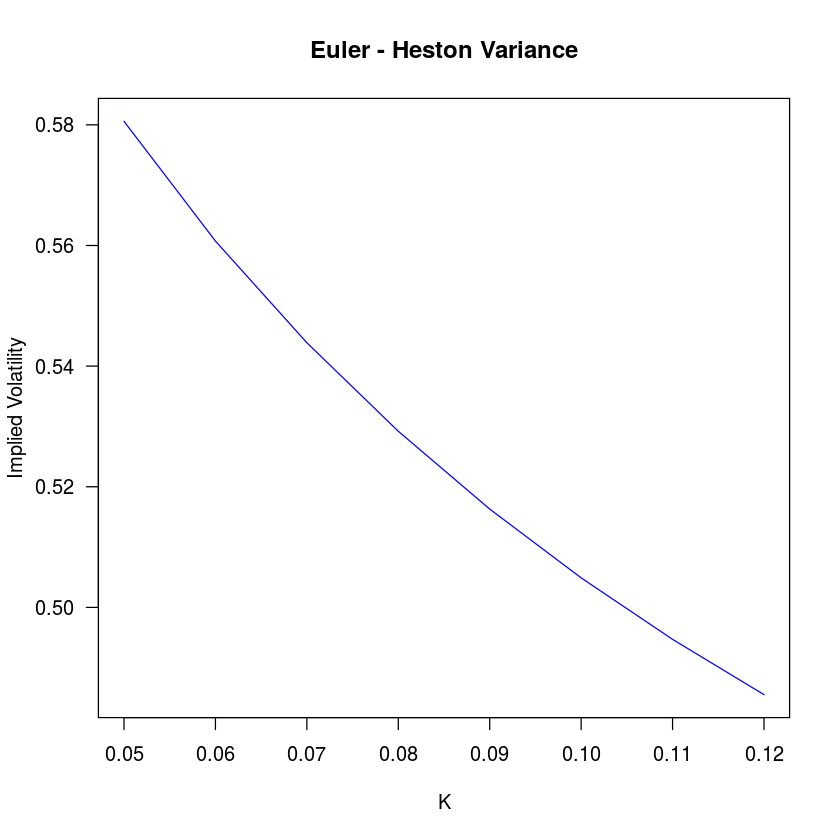

In [69]:
source('one_dimension/general_euler.r')
source('run_simulation.r')
source('black_scholes.r')
source('coefficients.r')

title <- 'Euler'
euler_heston_variance <- General_Euler(num_paths_euler, num_steps_euler,
                                       mu=make_mu_heston_variance(params$lambda, params$vbar),
                                       sigma=make_sigma_cir(params$eta),
                                       Texp=Texp, X0=X0)

heston_variance_vols[title] <- run_simulation(euler_heston_variance, strikes, Texp, X0, make_call_payoff,
                                              plot_title=title, num_paths_to_plot=FALSE)

## Lamperti Transform of Heston Variance Process
.
$$ 
dY_t = \left(\frac{-\lambda}{\eta\sqrt{v_t}}(v_t-\bar v) - \frac{\eta}{4\sqrt{v_t}}\right)dt + dW_t
\,\,\,\,
\mbox{where}
\,\,\,\,
Y_t = \frac2\eta\left(\sqrt{v_t} - \sqrt{v_0}\right)
$$
The BCC and BCC2 parameters fail the Feller condition. 
Using those parameters would make 0 an attainable variance.
We therefore use the BCC1 parameters.

Using parameters from regular Heston variance

### Euler Scheme

Prices
 0.0060212 0.003701993 0.00222389 0.001310698 0.0007592828 0.0004348986 0.0002459448 0.0001381857 
     K        Price Implied.Vol
1 0.05 0.0060212000   0.5816867
2 0.06 0.0037019931   0.5615551
3 0.07 0.0022238895   0.5445786
4 0.08 0.0013106976   0.5300523
5 0.09 0.0007592828   0.5172741
6 0.10 0.0004348986   0.5062359
7 0.11 0.0002459448   0.4962645
8 0.12 0.0001381857   0.4874984


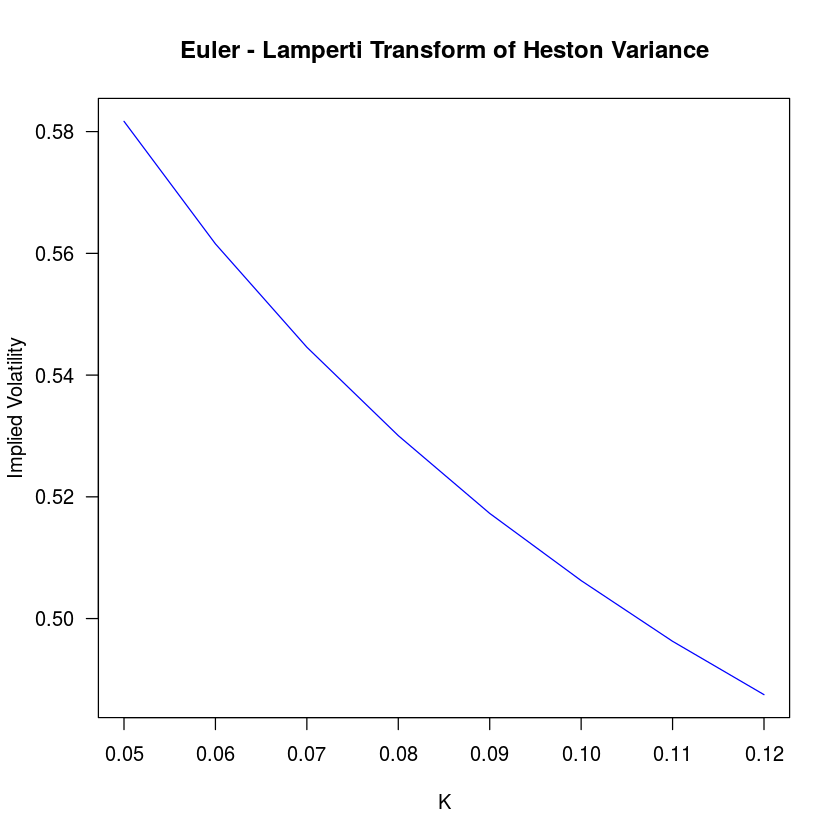

In [70]:
source('one_dimension/general_euler.r')
source('run_simulation.r')
source('black_scholes.r')
source('coefficients.r')

title <- 'Euler - Lamperti'
euler_heston_variance_lamperti <- General_Euler(num_paths_euler, num_steps_euler,
                                       mu=make_mu_heston_variance_lamperti(params$lambda, params$vbar, params$eta,
                                                                           params$v0),
                                       sigma=make_constant_coefficient(1),
                                       Texp=Texp, X0=X0,
                                       convert_y_to_x=make_convert_y_to_x_heston_variance(params$eta, params$v0), 
                                       convert_x_to_y=make_convert_x_to_y_heston_variance(params$eta, params$v0))

heston_variance_vols[title] <- run_simulation(euler_heston_variance_lamperti, strikes, Texp, X0, make_call_payoff,
                                              plot_title=title, num_paths_to_plot=FALSE)

### Exact Scheme

In [23]:
source('one_dimension/drifted_exact.r')
source('run_simulation.r')
source('black_scholes.r')
source('coefficients.r')

title <- 'Exact - Lamperti'
exact_heston_variance_lamperti <- Drifted_Exact_Vec(num_paths_exact, beta,
                                                    mu=make_mu_heston_variance_lamperti(params$lambda, params$vbar,
                                                                                        params$eta, params$v0),
                                                    sigma0=1,
                                                    Texp=Texp, X0=X0,
                                                    convert_y_to_x=make_convert_y_to_x_heston_variance(params$eta,
                                                                                                       params$v0), 
                                                    convert_x_to_y=make_convert_x_to_y_heston_variance(params$eta,
                                                                                                       params$v0))

heston_variance_vols[title] <- run_simulation(exact_heston_variance_lamperti, strikes, Texp, X0,
                                              make_call_payoff, plot_title=title, num_paths_to_plot=FALSE)

Prices
 5508.657 5508.646 5508.637 5508.629 5508.621 5508.613 5508.606 5508.598 


ERROR: Error in bisection(function(sigma) call_black_scholes(S, K, T, sigma, : Initial bounds must evaluate to opposite sign.


## Comparing Implied Volatilities

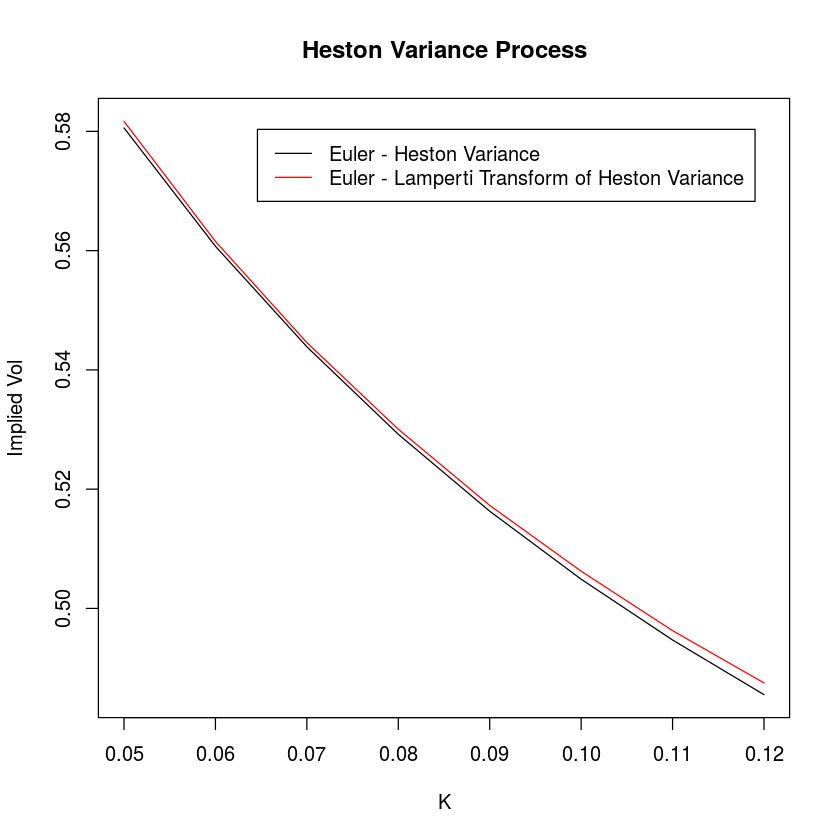

In [71]:
compare_vols(heston_variance_vols, 'Heston Variance Process')

## Black Scholes Process

$$ dX_t = \mu X_t dt + \sigma X_t dW_t$$

### Parameters

In [36]:
num_paths_euler <- 1000000
num_steps_euler <- 100

num_paths_exact <- 1000000
beta <- 0.2

Texp <- 1
X0 <- 1
mu0 <- .1
sigma0 <- .3
strikes <- seq(0.5, 1.5, by=0.1)
black_scholes_vols <- data.frame(K=strikes)

### Euler Scheme

Prices
 0.6055373 0.5071442 0.4125912 0.3254088 0.2488828 0.1849714 0.1339907 0.09495446 0.06608265 0.04529404 0.03066911 
     K      Price Implied.Vol
1  0.5 0.60553732   1.0519883
2  0.6 0.50714416   0.8563676
3  0.7 0.41259122   0.7071664
4  0.8 0.32540877   0.5973605
5  0.9 0.24888281   0.5203077
6  1.0 0.18497145   0.4678877
7  1.1 0.13399070   0.4323676
8  1.2 0.09495446   0.4079475
9  1.3 0.06608265   0.3907411
10 1.4 0.04529404   0.3781729
11 1.5 0.03066911   0.3687324


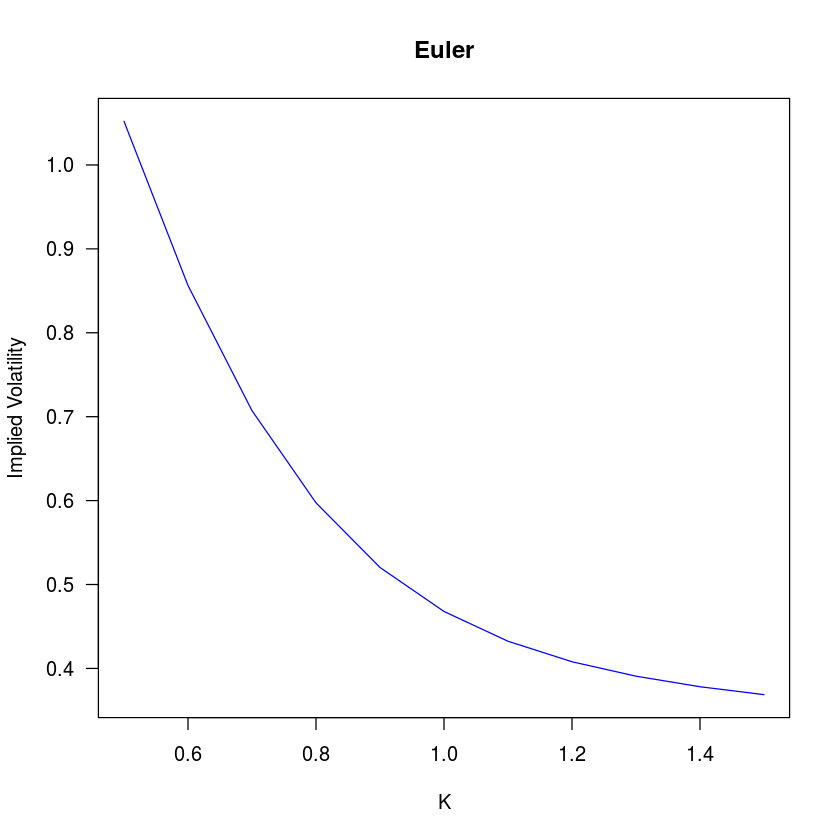

In [37]:
title <- 'Euler'
euler_black_scholes <- General_Euler(num_paths_euler, num_steps_euler,
                                       mu=make_affine_coefficient(mu0, 0),
                                       sigma=make_affine_coefficient(sigma0, 0),
                                       Texp=Texp, X0=X0)

black_scholes_vols[title] <- run_simulation(euler_black_scholes, strikes, Texp, X0, make_call_payoff,
                                            plot_title=title, num_paths_to_plot=FALSE)

## Lamperti Transform of Black Scholes Process
.
$$ 
dY_t = \left(\frac{\mu}{\sigma}-\frac{\sigma}{2}\right)dt + dW_t
\,\,\,\,
\mbox{where}
\,\,\,\,
Y_t = \frac{1}{\sigma}\ln\left(\frac{X_t}{X_0} \right)
$$

### Euler Scheme

Prices
 0.6052371 0.5068148 0.4122327 0.3250554 0.2485975 0.1847916 0.1339933 0.09512034 0.06633266 0.04558397 0.03097038 
     K      Price Implied.Vol
1  0.5 0.60523706   1.0504696
2  0.6 0.50681475   0.8549716
3  0.7 0.41223269   0.7058677
4  0.8 0.32505541   0.5962502
5  0.9 0.24859753   0.5195119
6  1.0 0.18479160   0.4674244
7  1.1 0.13399330   0.4323741
8  1.2 0.09512034   0.4083757
9  1.3 0.06633266   0.3914427
10 1.4 0.04558397   0.3791009
11 1.5 0.03097038   0.3698783


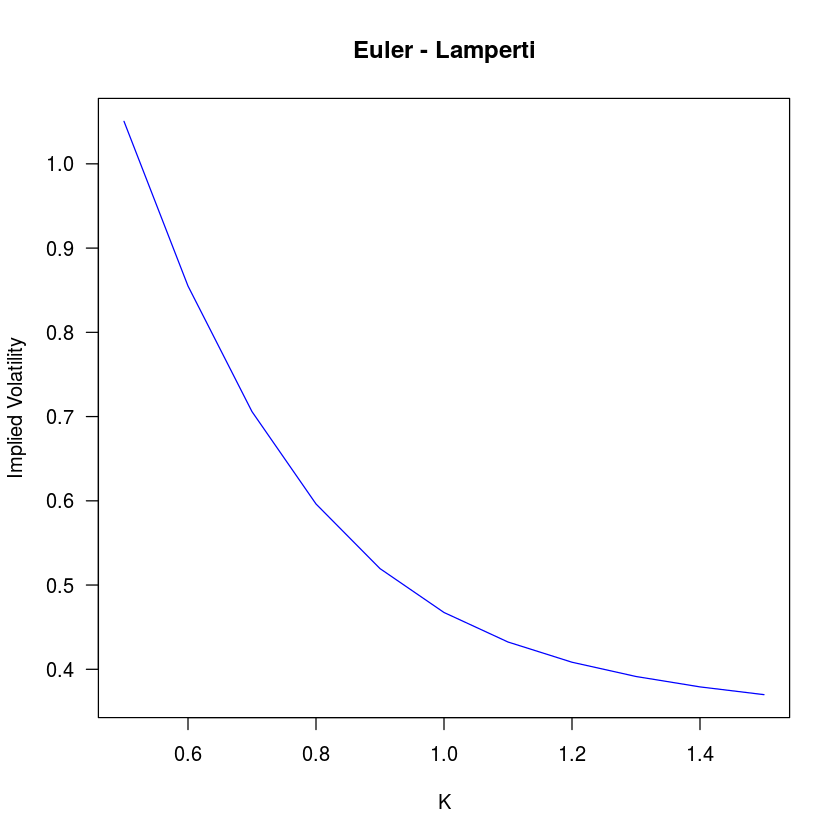

In [38]:
title <- 'Euler - Lamperti'
euler_black_scholes_lamperti <- General_Euler(num_paths_euler, num_steps_euler,
                                       mu=make_mu_black_scholes_lamperti(mu0, sigma0),
                                       sigma=make_constant_coefficient(1),
                                       Texp=Texp, X0=X0,
                                       convert_y_to_x=make_convert_y_to_x_black_scholes(sigma0, X0), 
                                       convert_x_to_y=make_convert_x_to_y_black_scholes(sigma0, X0))

black_scholes_vols[title] <- run_simulation(euler_black_scholes_lamperti, strikes, Texp, X0, make_call_payoff,
                                            plot_title=title, num_paths_to_plot=FALSE)

### Exact Scheme

Prices
 0.6061593 0.5077495 0.4131587 0.3258977 0.2493355 0.1853973 0.1344337 0.09542191 0.06649703 0.04562638 0.03091856 
     K      Price Implied.Vol
1  0.5 0.60615930   1.0551334
2  0.6 0.50774946   0.8589318
3  0.7 0.41315872   0.7092214
4  0.8 0.32589767   0.5988966
5  0.9 0.24933550   0.5215707
6  1.0 0.18539728   0.4689848
7  1.1 0.13443374   0.4334781
8  1.2 0.09542191   0.4091540
9  1.3 0.06649703   0.3919037
10 1.4 0.04562638   0.3792365
11 1.5 0.03091856   0.3696815


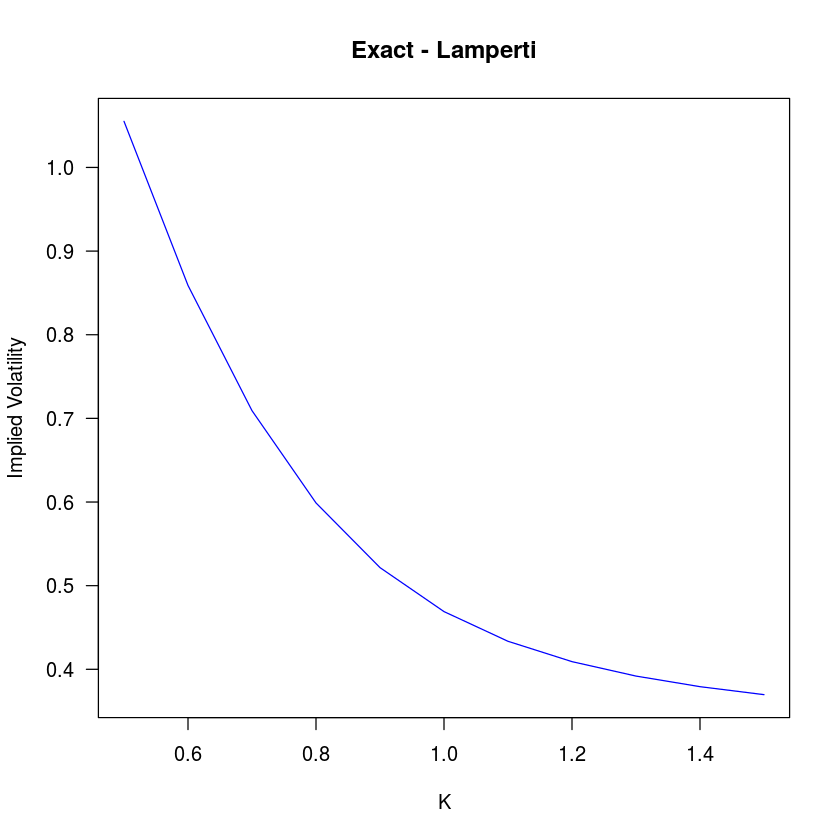

In [41]:
title <- 'Exact - Lamperti'
exact_black_scholes_lamperti <- Drifted_Exact_Vec(num_paths_exact, beta,
                                                  mu=make_mu_black_scholes_lamperti(mu0, sigma0),
                                                  sigma0=1,
                                                  Texp=Texp, X0=X0,
                                                  convert_y_to_x=make_convert_y_to_x_black_scholes(sigma0, X0), 
                                                  convert_x_to_y=make_convert_x_to_y_black_scholes(sigma0, X0))

black_scholes_vols[title] <- run_simulation(exact_black_scholes_lamperti, strikes, Texp, X0, make_call_payoff,
                                            plot_title=title, num_paths_to_plot=FALSE)

### Comparing Implied Volatilities

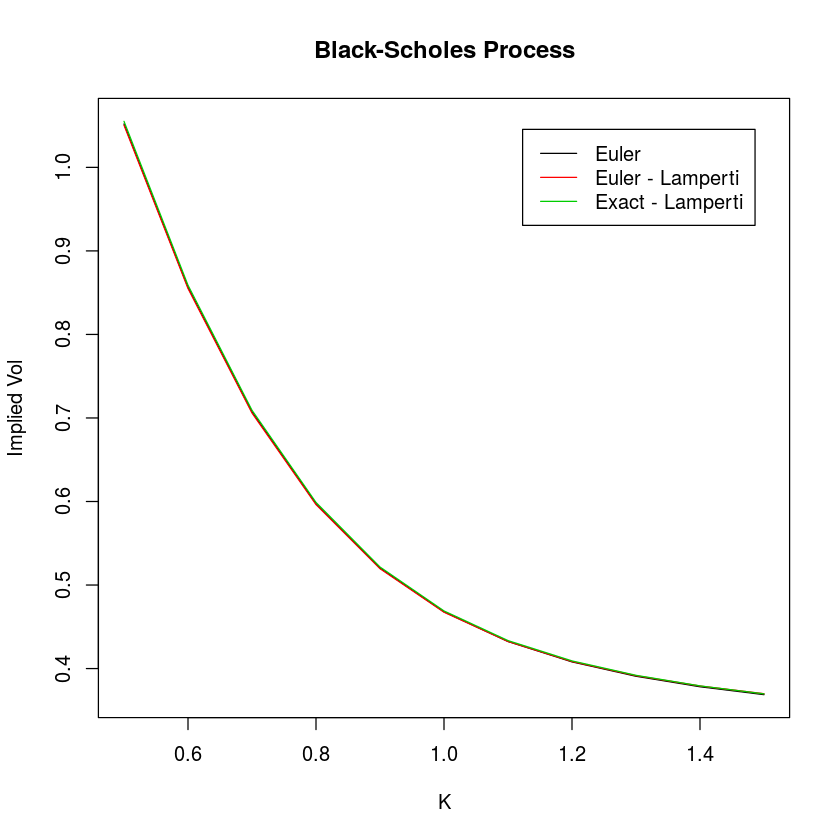

In [42]:
compare_vols(black_scholes_vols, 'Black-Scholes Process')

## Sine Process
$$ X_0=10, \,\,\,\, dX_t = \sin(\pi X_t) dt + 3dW_t$$

### Parameters

In [14]:
num_paths_euler <- 1000000
num_steps_euler <- 100

num_paths_exact <- 1000000
beta <- 0.2

Texp <- 1
X0 <- 10
sigma0 <- 3
strikes <- seq(5, 15, by=1)
sin_vols <- data.frame(K=strikes)

### Euler Scheme

Prices
 5.058699 4.126936 3.24927 2.454286 1.762493 1.19872 0.7633783 0.4549162 0.2497919 0.1275208 0.05936821 
    K      Price Implied.Vol
1   5 5.05869905   0.4178036
2   6 4.12693623   0.3852900
3   7 3.24926955   0.3582468
4   8 2.45428637   0.3366211
5   9 1.76249329   0.3173480
6  10 1.19872005   0.3016139
7  11 0.76337827   0.2870825
8  12 0.45491623   0.2747884
9  13 0.24979194   0.2630646
10 14 0.12752083   0.2532002
11 15 0.05936821   0.2437897


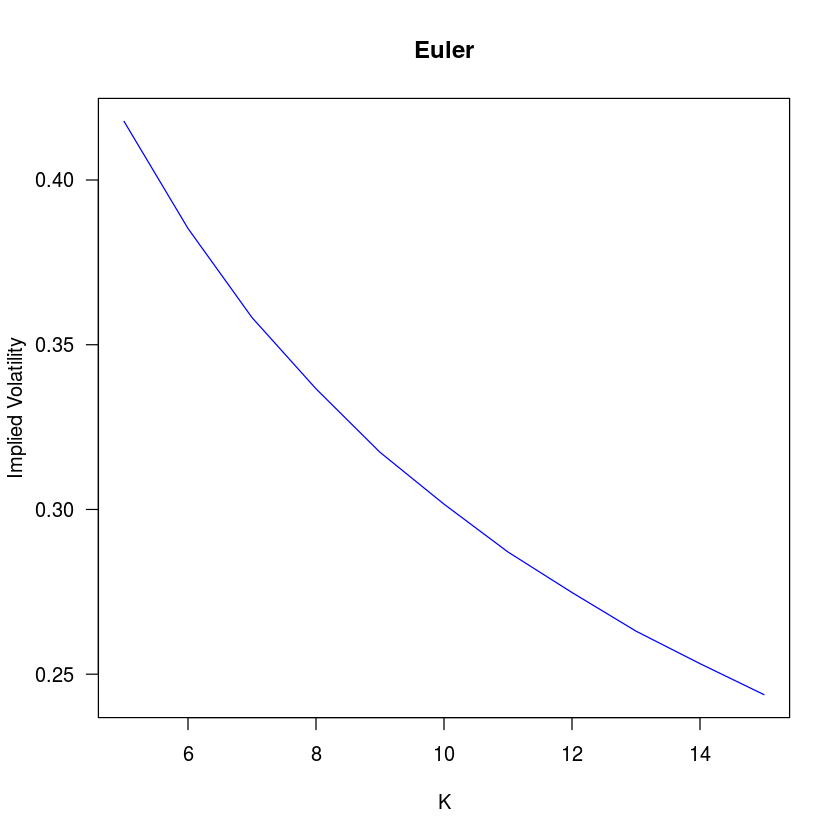

In [15]:
title <- 'Euler'
euler_sin <- General_Euler(num_paths_euler, num_steps_euler,
                           mu=make_mu_sin(1, 1),
                           sigma=make_constant_coefficient(sigma0),
                           Texp=Texp, X0=X0)

sin_vols[title] <- run_simulation(euler_sin, strikes, Texp, X0, make_call_payoff,
                                  plot_title=title, num_paths_to_plot=FALSE)

### Exact Scheme

Prices
 5.040088 4.11268 3.237436 2.445285 1.753174 1.192705 0.7568539 0.4482646 0.2435342 0.1235011 0.05601407 
    K      Price Implied.Vol
1   5 5.04008773   0.3882555
2   6 4.11267960   0.3736656
3   7 3.23743630   0.3522849
4   8 2.44528467   0.3334274
5   9 1.75317422   0.3147123
6  10 1.19270534   0.3000891
7  11 0.75685395   0.2854173
8  12 0.44826457   0.2728708
9  13 0.24353415   0.2607729
10 14 0.12350107   0.2511094
11 15 0.05601407   0.2409879


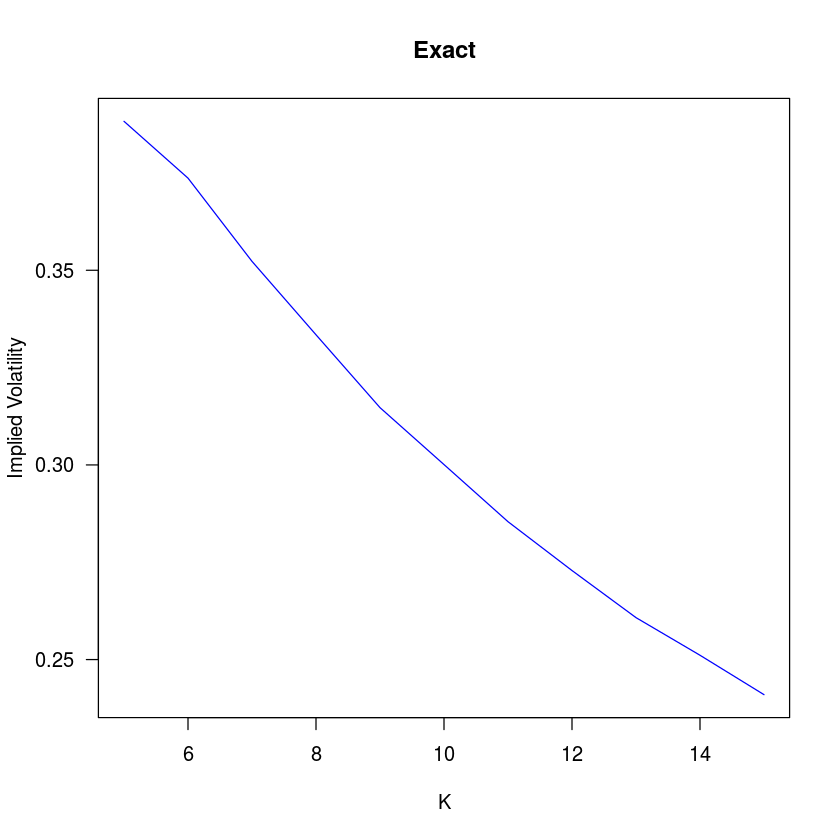

In [20]:
title <- 'Exact'
exact_sin <- Drifted_Exact_Vec(num_paths_exact, beta,
                               mu=make_mu_sin(1, 1),
                               sigma0=sigma0,
                               Texp=Texp, X0=X0)

sin_vols[title] <- run_simulation(exact_sin, strikes, Texp, X0, make_call_payoff,
                                  plot_title=title, num_paths_to_plot=FALSE)

### Comparing Implied Volatilities

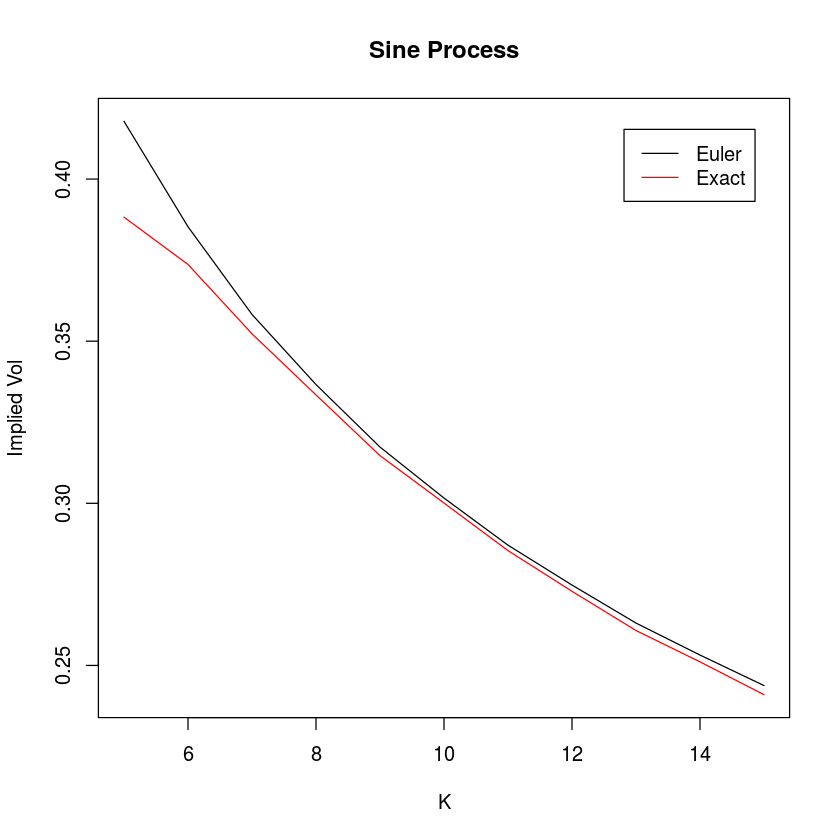

In [21]:
compare_vols(sin_vols,'Sine Process')

## Ornstein–Uhlenbeck Process

$$ X_0=1, \,\,\,\, dX_t = -\lambda(X_t - \bar x) dt + \sigma dW_t$$

### Parameters

In [29]:
num_paths_euler <- 100000
num_steps_euler <- 100

num_paths_exact <- 100000
beta <- 0.2

Texp <- 1
X0 <- 1
lambda <- 1
xbar <- 1
sigma0 <- .3
strikes <- seq(0.5, 1.5, by=0.1)
ou_vols <- data.frame(K=strikes)

### Euler Scheme

Prices
 0.5002696 0.4015006 0.3054957 0.2160359 0.1386934 0.07884087 0.03873811 0.0161191 0.005583452 0.00159208 0.0003692876 
     K        Price Implied.Vol
1  0.5 0.5002695761   0.2661375
2  0.6 0.4015006177   0.2512150
3  0.7 0.3054957327   0.2349102
4  0.8 0.2160358669   0.2206791
5  0.9 0.1386933838   0.2085026
6  1.0 0.0788408660   0.1979474
7  1.1 0.0387381083   0.1886734
8  1.2 0.0161191035   0.1805051
9  1.3 0.0055834522   0.1732259
10 1.4 0.0015920798   0.1667428
11 1.5 0.0003692876   0.1608569


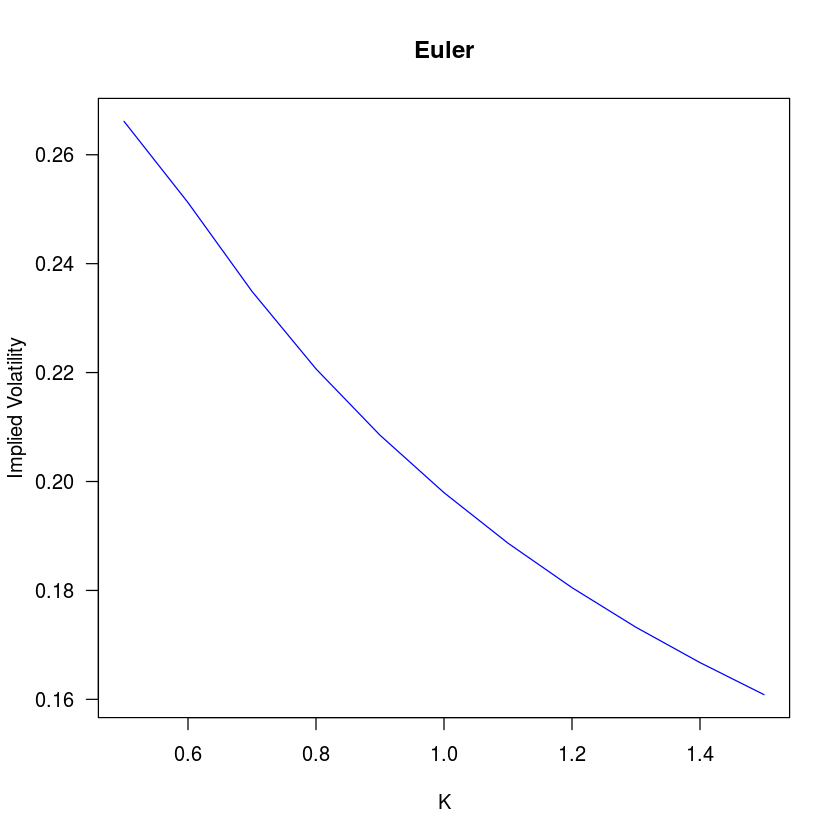

In [30]:
title <- 'Euler'
euler_ou <- General_Euler(num_paths_euler, num_steps_euler,
                          mu=make_mean_reverting_coefficient(lambda, xbar),
                          sigma=make_constant_coefficient(sigma0),
                          Texp=Texp, X0=X0)

ou_vols[title] <- run_simulation(euler_ou, strikes, Texp, X0, make_call_payoff,
                                 plot_title=title, num_paths_to_plot=FALSE)

### Exact Scheme

Prices
 0.5151305 0.416205 0.3202719 0.2310721 0.1541601 0.09472709 0.05056499 0.02305287 0.007761283 0.001912171 0.0004964707 
     K        Price Implied.Vol
1  0.5 0.5151305385   0.5190433
2  0.6 0.4162049781   0.4116628
3  0.7 0.3202719301   0.3341680
4  0.8 0.2310721163   0.2837907
5  0.9 0.1541600848   0.2541838
6  1.0 0.0947270895   0.2380062
7  1.1 0.0505649895   0.2203664
8  1.2 0.0230528699   0.2054453
9  1.3 0.0077612828   0.1871121
10 1.4 0.0019121707   0.1716577
11 1.5 0.0004964707   0.1664711


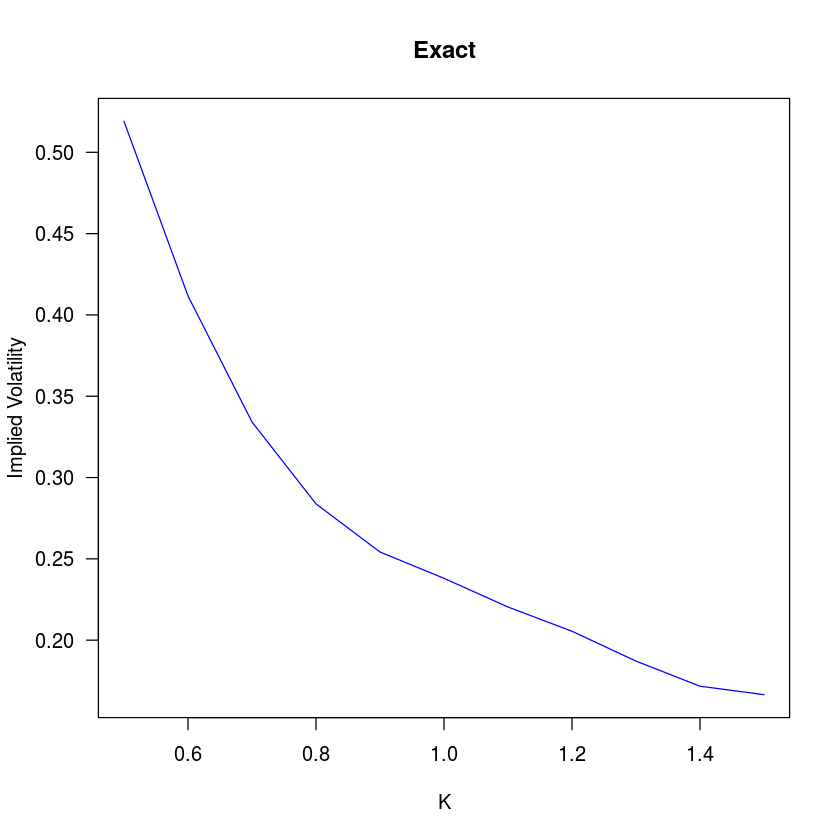

In [34]:
title <- 'Exact'
euler_ou <- Drifted_Exact_Vec(num_paths_exact, beta,
                              mu=make_mean_reverting_coefficient(lambda, xbar),
                              sigma=sigma0,
                              Texp=Texp, X0=X0)

ou_vols[title] <- run_simulation(euler_ou, strikes, Texp, X0, make_call_payoff,
                                 plot_title=title, num_paths_to_plot=FALSE)

### Comparing Implied Volatilities

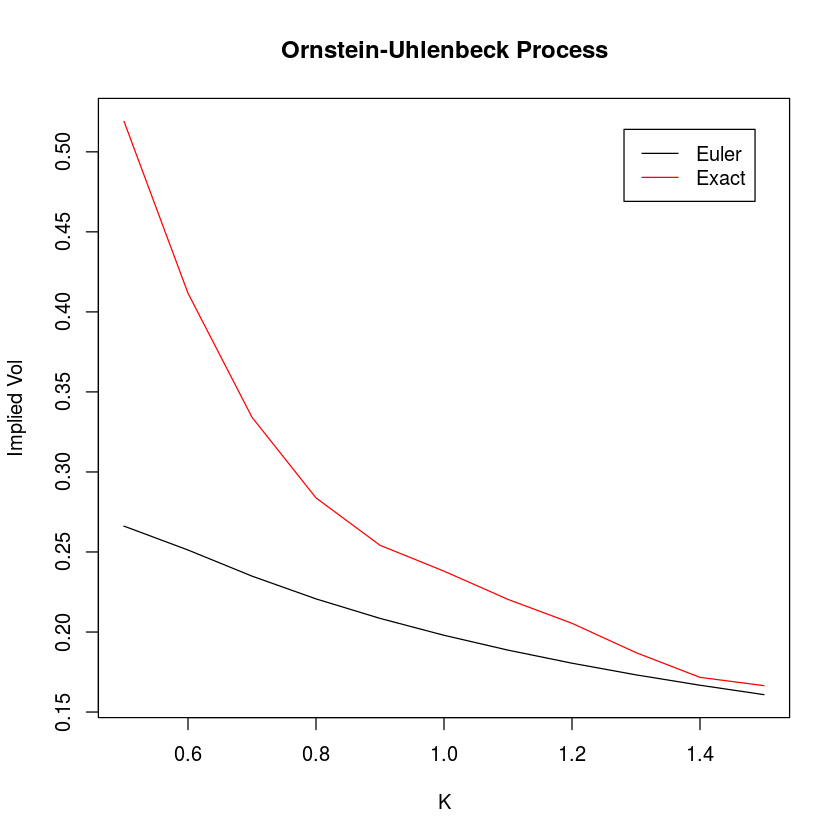

In [35]:
compare_vols(ou_vols,'Ornstein-Uhlenbeck Process')